In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data_salary_dataset = pd.read_csv('salary_dataset.csv')
data1 = data_salary_dataset
data1

,no,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [22]:
data1 = data1.drop('no', axis=1)
data1.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


<function matplotlib.pyplot.show(close=None, block=None)>

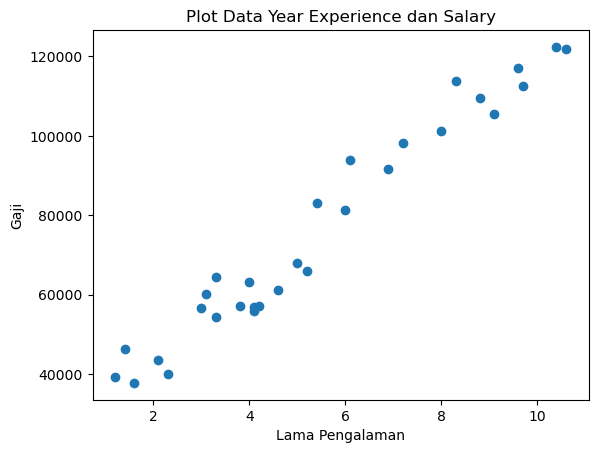

In [42]:
plt.scatter(data1.YearsExperience, data1.Salary)
plt.title('Plot Data Year Experience dan Salary')
plt.xlabel('Lama Pengalaman')
plt.ylabel('Gaji')
plt.show

In [24]:
data_data_penjualan = pd.read_csv('data-penjualan.csv', delimiter=';')
data2 = data_data_penjualan
data2

,promosi,penjualan
0,25,100
1,27,105
2,29,108
3,30,109
4,35,120
5,50,145
6,55,143
7,60,150
8,63,154
9,65,157


In [25]:
data2.head()

,promosi,penjualan
0,25,100
1,27,105
2,29,108
3,30,109
4,35,120


In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   promosi    15 non-null     int64
 1   penjualan  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


<function matplotlib.pyplot.show(close=None, block=None)>

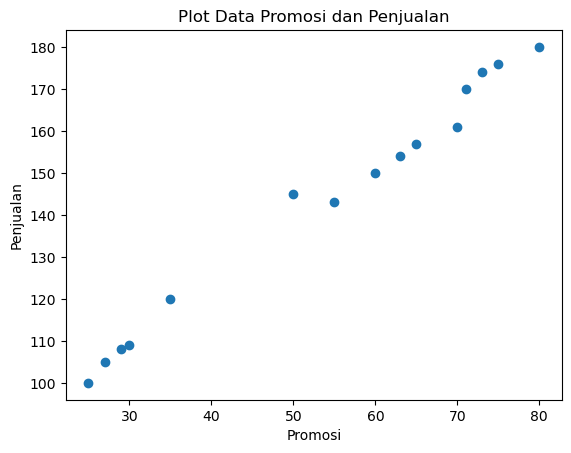

In [41]:
plt.scatter(data2.promosi, data2.penjualan)
plt.title('Plot Data Promosi dan Penjualan')
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.show

# Korelasi

In [29]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [30]:
data2.corr()

,promosi,penjualan
promosi,1.00000,0.99369
penjualan,0.99369,1.00000


# Split Kolom

In [31]:
import numpy as np

In [32]:
#Data Salary
x = data1['YearsExperience'].values[:, np.newaxis]
y = data1['Salary'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=0)

#Data Penjualan
promosi = data2['promosi'].values[:, np.newaxis]
penjualan = data2['penjualan'].values

# Modeling

In [33]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model2 = LinearRegression()

model1.fit(x_train, y_train)
model2.fit(promosi, penjualan)

LinearRegression()

# Testing

In [34]:
x_test

array([[ 1.6],
       [10.4],
       [ 4.2],
       [ 4. ],
       [ 9.6],
       [ 8.8],
       [ 9.7],
       [ 4.1],
       [ 5.4]])

In [36]:
#Khusus Split Data
pred_salary = model1.predict(x_test)
print('Prediksi Gaji : ', pred_salary)


Prediksi Gaji :  [ 40818.78327049 123189.08258899  65155.46261459  63283.41035735
 115700.87356004 108212.66453108 116636.89968866  64219.43648597
  76387.77615802]


In [37]:
#Dataset 1
x_test_baru = [[1,1],[11],[7]]
pred_salary = model1.predict(x_test)

#Dataset 2
promosi_test = [[20],[100]]
pred_penjualan = model2.predict(promosi_test)

print('Prediksi Gaji : ', pred_salary)
print('Prediksi Penjualan : ', pred_penjualan)

Prediksi Gaji :  [ 40818.78327049 123189.08258899  65155.46261459  63283.41035735
 115700.87356004 108212.66453108 116636.89968866  64219.43648597
  76387.77615802]
Prediksi Penjualan :  [ 95.38781949 208.95989944]


# Visualisasi

<function matplotlib.pyplot.show(close=None, block=None)>

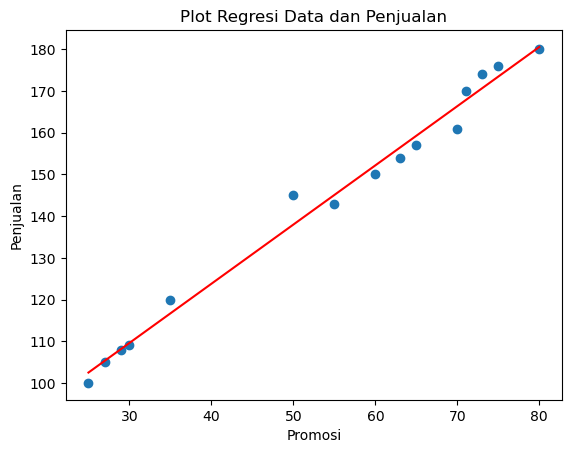

In [39]:
prediksi_penjualan = model2.predict(promosi)
df_baru = pd.DataFrame({'promosi' : data2.promosi, 'penjualan' : prediksi_penjualan})
plt.scatter(data2.promosi, data2.penjualan)
plt.plot(df_baru.promosi, df_baru.penjualan, color='red')
plt.title('Plot Regresi Data dan Penjualan')
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.show


# Cek Akurasi

In [49]:
from sklearn.metrics import r2_score
akurasi = r2_score(data2, df_baru)
print("Akurasinya adalah",akurasi*100,"%")

Akurasinya adalah 99.37098507592287 %


# Pembuktian Rumus

In [51]:
# Rumus Regresi adalah y=a+bx (a=intercept dan b=koefisien)
print('Koefisien : ', model2.coef_)
print('Intercept : ', model2.intercept_)

Koefisien :  [1.419651]
Intercept :  66.99479949720258


In [53]:
# Testing Rumus
y = model2.intercept_+ model2.coef_* 27
print(y)

[105.32537648]
